In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [10]:
df.groupby('Survived').median()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,455.0,3.0,28.0,0.0,0.0,10.5
1,439.5,2.0,28.0,0.0,0.0,26.0


<AxesSubplot:xlabel='Sex'>

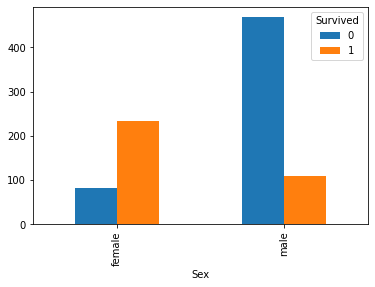

In [11]:
pd.crosstab(df.Sex,df.Survived).plot(kind='bar')

<AxesSubplot:xlabel='Age'>

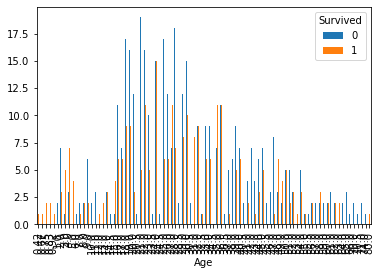

In [88]:
pd.crosstab(df.Age,df.Survived).plot(kind='bar')

In [21]:
new = df[['Pclass','Sex','Fare']]
new

,Pclass,Sex,Fare
0,3,male,7.2500
1,1,female,71.2833
2,3,female,7.9250
3,1,female,53.1000
4,3,male,8.0500
...,...,...,...
886,2,male,13.0000
887,1,female,30.0000
888,3,female,23.4500
889,1,male,30.0000


In [23]:
dummy = pd.get_dummies(df.Sex)
dummy

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [26]:
concated = pd.concat([new,dummy],axis='columns')
concated

,Pclass,Sex,Fare,female,male
0,3,male,7.2500,0,1
1,1,female,71.2833,1,0
2,3,female,7.9250,1,0
3,1,female,53.1000,1,0
4,3,male,8.0500,0,1
...,...,...,...,...,...
886,2,male,13.0000,0,1
887,1,female,30.0000,1,0
888,3,female,23.4500,1,0
889,1,male,30.0000,0,1


In [34]:
X = concated.drop(['male','Sex'],axis='columns')
X

,Pclass,Fare,female
0,3,7.2500,0
1,1,71.2833,1
2,3,7.9250,1
3,1,53.1000,1
4,3,8.0500,0
...,...,...,...
886,2,13.0000,0
887,1,30.0000,1
888,3,23.4500,1
889,1,30.0000,0


In [35]:
y=df.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [36]:
from sklearn import linear_model
model = linear_model.LogisticRegression()

In [37]:
model.fit(X,y)

LogisticRegression()

In [58]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [59]:
test_sm = test[['Pclass','Sex','Fare']]
test_sm

,Pclass,Sex,Fare
0,3,male,7.8292
1,3,female,7.0000
2,2,male,9.6875
3,3,male,8.6625
4,3,female,12.2875
...,...,...,...
413,3,male,8.0500
414,1,female,108.9000
415,3,male,7.2500
416,3,male,8.0500


In [60]:
d = pd.get_dummies(test_sm.Sex)
d

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [61]:
c = pd.concat([test_sm,d],axis='columns')
c

,Pclass,Sex,Fare,female,male
0,3,male,7.8292,0,1
1,3,female,7.0000,1,0
2,2,male,9.6875,0,1
3,3,male,8.6625,0,1
4,3,female,12.2875,1,0
...,...,...,...,...,...
413,3,male,8.0500,0,1
414,1,female,108.9000,1,0
415,3,male,7.2500,0,1
416,3,male,8.0500,0,1


In [78]:
P= c.drop(['male','Sex'],axis='columns')
P

,Pclass,Fare,female
0,3,7.8292,0
1,3,7.0000,1
2,2,9.6875,0
3,3,8.6625,0
4,3,12.2875,1
...,...,...,...
413,3,8.0500,0
414,1,108.9000,1
415,3,7.2500,0
416,3,8.0500,0


In [79]:
P.fillna(0,inplace=True)
P

,Pclass,Fare,female
0,3,7.8292,0
1,3,7.0000,1
2,2,9.6875,0
3,3,8.6625,0
4,3,12.2875,1
...,...,...,...
413,3,8.0500,0
414,1,108.9000,1
415,3,7.2500,0
416,3,8.0500,0


In [80]:
res = model.predict(P)
res

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [81]:
P['PassengerId'] = test.PassengerId
P['Survived'] = res
P

,Pclass,Fare,female,PassengerId,Survived
0,3,7.8292,0,892,0
1,3,7.0000,1,893,1
2,2,9.6875,0,894,0
3,3,8.6625,0,895,0
4,3,12.2875,1,896,1
...,...,...,...,...,...
413,3,8.0500,0,1305,0
414,1,108.9000,1,1306,1
415,3,7.2500,0,1307,0
416,3,8.0500,0,1308,0


In [82]:
P=P.drop(['Pclass','Fare','female'],axis='columns')

In [83]:
P

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [85]:
P.to_csv('ans.csv',index=False)